In [82]:
from pathlib import Path
from astropy.io import fits
from astropy.stats import sigma_clip
import numpy as np
import matplotlib.pyplot as plt
import math

In [83]:
# sigma clipping 5-10 sigma, 
# for dome flats find difference images for all flats relative to one and 
# find the mean of the whole difference image (with sigma clipping to ignore outliers)
# astropy function can show which pixels were removed
# If mean = 0, retry THIS FILE but cutting bad pixels from flats
# Divide flat by its mean to normalize

mean of the sigma clipped difference image d1016.fits = 524.10
mean of image d1016.fits = 32199.21
d1016.fits


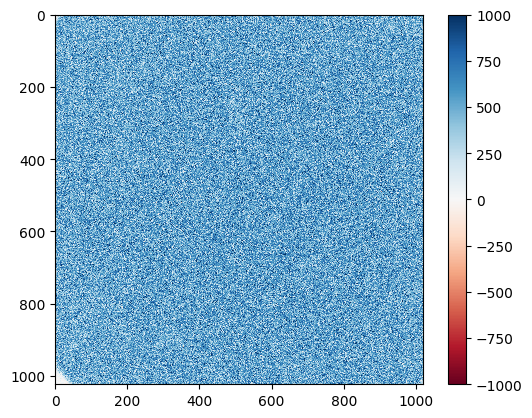

mean of the sigma clipped difference image d1017.fits = 774.37
mean of image d1017.fits = 32448.33
d1017.fits


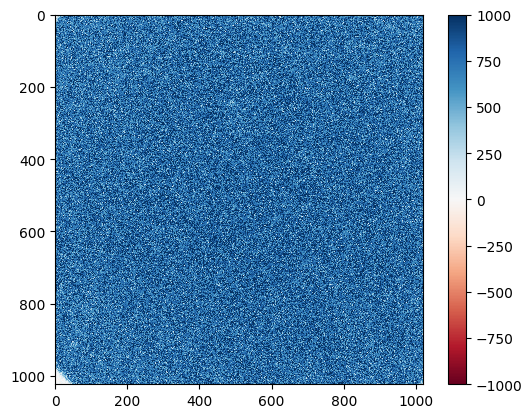

mean of the sigma clipped difference image d1018.fits = 716.81
mean of image d1018.fits = 32391.93
d1018.fits


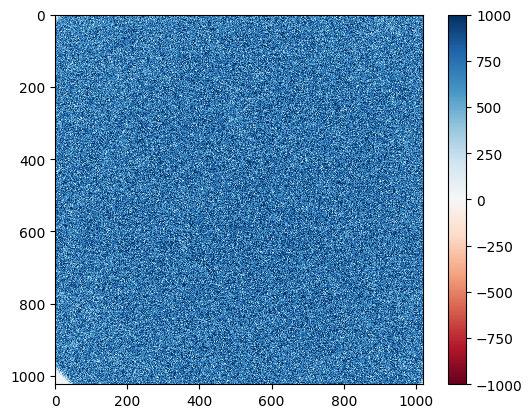

mean of the sigma clipped difference image d1019.fits = 241.33
mean of image d1019.fits = 31916.48
d1019.fits


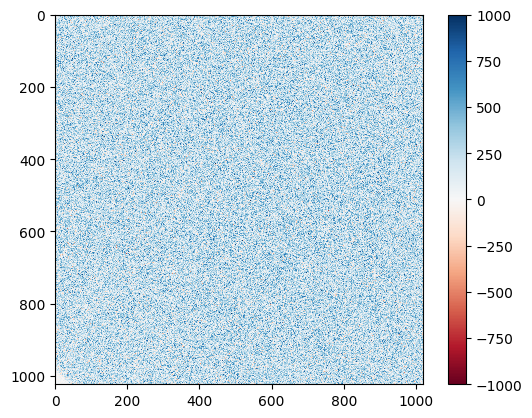

In [94]:
dome_flats = [Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1016.fits"),
              Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1017.fits"),
              Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1018.fits"),
              Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1019.fits"),
              Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1020.fits"),]

sigma_count = 10

clipped_flats_directory = Path(f"C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/clipped_flats_{sigma_count}sig")
# clipped_flats_directory = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/clipped_flats_10sig")

Path.mkdir(clipped_flats_directory, exist_ok=True)

flat_images = dome_flats[:-1]
baseline = dome_flats[-1]

with fits.open(baseline) as hdu:
    baseline_data = hdu[0].data
    baseline_data = np.delete(baseline_data, [256, 783, 784, 1002], axis=1)

diff_images = []
sds = []
masks = []

for image in flat_images:
    with fits.open(image) as hdu:
        header = hdu[0].header
        data = hdu[0].data
        data = np.delete(data, [256, 783, 784, 1002], axis=1)
        diff_image = data - baseline_data
        masked_array = sigma_clip(diff_image, sigma=sigma_count, masked=True)
        mean_diff = np.ma.mean(masked_array)
        print(f"mean of the sigma clipped difference image {image.name} = {mean_diff:.2f}")
        sd = np.std(masked_array.data)
        mask = masked_array.mask
        
        clipped_image = masked_array.data
        updated_flat_data = data
        for index, _ in np.ndenumerate(data):
            if mask[index]:
                clipped_image[index] = np.nan
                updated_flat_data[index] = np.nan
        
        mean = np.nanmean(updated_flat_data)
        print(f"mean of image {image.name} = {mean:.2f}")
        
        print(image.name)
        plt.imshow(clipped_image, interpolation="nearest", vmin=-1000, vmax=1000, cmap='RdBu')
        # plt.imshow(data, interpolation="nearest", )#vmin=-1000, vmax=1000)
        # plt.imshow(updated_flat_data, interpolation="nearest", )#vmin=-1000, vmax=1000)
        
        plt.colorbar()
        plt.show()
        
        # Iterate over the positions and insert np.nan columns
        for pos in sorted([256, 783, 784, 1002]):
            updated_flat_data = np.insert(updated_flat_data, pos, np.nan, axis=1)
        updated_history = str(header['HISTORY']) + f', flat clipped to {sigma_count} sigma'
        del header['HISTORY']
        header['HISTORY'] = updated_history
        output_path = clipped_flats_directory / image.name
        fits.writeto(output_path, updated_flat_data, header, overwrite=True)

In [85]:
image_bias_1 = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw/d1004.fits")
image_bias_2 = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw/d1005.fits")

image_domeflat_1 = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/clipped_flats/d1017.fits")
image_domeflat_2 = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/clipped_flats/d1018.fits")

image_skyflat_1 = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1036.fits")
image_skyflat_2 = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1035.fits")

image_obj_1 = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1062.fits")
image_obj_2 = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1063.fits")

image_obj_1 = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1055.fits")
image_obj_2 = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1056.fits")

# image_obj_1 = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1072.fits")
# image_obj_2 = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw-proc/unbias/d1073.fits")

images = [image_bias_1, image_bias_2, image_domeflat_1, image_domeflat_2, image_obj_1, image_obj_2]
# images = [image_bias_1, image_bias_2, image_skyflat_1, image_skyflat_2, image_obj_1, image_obj_2]
# images = [image_obj_1, image_obj_2]
# images = [image_bias_1, image_bias_2]
images = [image_bias_1, image_bias_2, image_domeflat_1, image_domeflat_2,]

In [86]:
bin_width = 20
num_images = len(images)

obj_counts = {}
data_all = {}
bins_all = {}
data_avg_all = {}
data_diff_all = {}

for i, image in enumerate(images):
    with fits.open(image) as hdu:
        header = hdu[0].header
        
        objname = header["OBJECT"]
        if objname not in data_all:
            obj_counts[objname] = 0
            data_all[objname] = []
            bins_all[objname] = []
            data_diff_all[objname] = []
        
        data_single = hdu[0].data
        # Delete hot columns / cool columns
        data_single = np.delete(data_single, [256, 783, 784, 1002], axis=1)
        # data_single = np.delete(data_single, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], axis=0)
        data_single = data_single[5:-5, 5:-5]

        data_all[objname].append(data_single)
        obj_counts[objname] += 1
        
        # # Calculate number of histogram bins, based on range of data
        # num_bins = int((np.max(data_single)-np.min(data_single))/bin_width) + 1
        # # Create the histogram -- counts = frequency within each bin, bin_edges = values at bin boundaries
        # counts, bin_edges = np.histogram(data_single, bins=num_bins)
        
        # # Plot histogram using matplotlib
        # plot_histo(bin_edges, counts, image, header)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\allis\\Documents\\2024-2025_Local\\Akamai Internship\\pipeline-testing\\test-data-05-12\\clipped_flats\\d1017.fits'

Calculate the average pixel value between all images of the same object/type

In [ ]:
data_avg_max_all = []
data_avg_min_all = []

for objname in obj_counts:
    data_avg = np.stack(data_all[objname]).mean(axis=0)
    data_avg_all[objname] = np.stack(data_all[objname]).mean(axis=0)
    data_avg_max_all.append(np.nanmax(data_avg))
    data_avg_min_all.append(np.nanmin(data_avg))
    for i in range(obj_counts[objname]):
        data_diff_all[objname].append(data_all[objname][i] - data_avg)
data_avg_max = max(data_avg_max_all)
data_avg_min = min(data_avg_min_all)

Fill the histogram bins with the actual pixel values that fall within their range

In [ ]:
num_bins_all = int((data_avg_max-data_avg_min)/bin_width) + 1
bins_avgs = [[] for _ in range(num_bins_all)]   # Likely uneeded
bins_diffs = [[] for _ in range(num_bins_all)]

for objname in obj_counts:
    for index, value in np.ndenumerate(data_avg_all[objname]):
        if np.isnan(value):
            continue
        bin_index = int(np.floor((value - data_avg_min) / bin_width))
        for i in range(obj_counts[objname]):
            bins_diffs[bin_index].append(data_diff_all[objname][i][*index])
        bins_avgs[bin_index].append(value)

2007
40595.4


Create a histogram of all the values in just one bin

In [ ]:
counts_per_bin = [len(bin) for bin in bins_diffs]

bin_to_analyze = np.argmax(counts_per_bin)

def bin_histo(bins, bin_index):
    # Create the histogram -- counts = frequency within each bin, bin_edges = values at bin boundaries
    subcounts, subbin_edges = np.histogram(bins[bin_index], bins=int(bin_width), )
    # Plot histogram using matplotlib
    plot_histo(subbin_edges, subcounts, image, header)

# bin_histo(bins_diffs, bin_to_analyze )

Find the mean and standard deviation for all bins

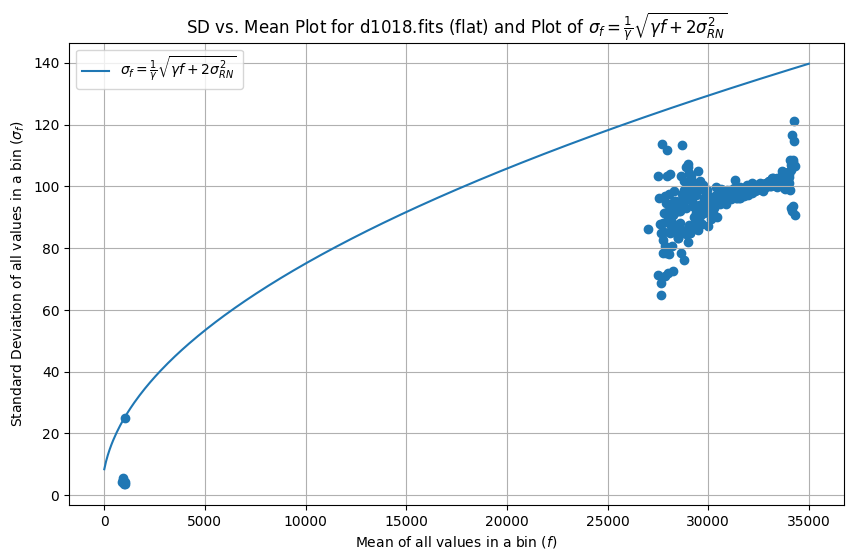

In [ ]:
means = []
sds = []

# for i, bins in enumerate(bins_all):
for bin_index in range(len(bins_diffs)):
    if len(bins_diffs[bin_index]) > 50:
        sd = np.std(bins_diffs[bin_index])
        mean = np.mean(bins_avgs[bin_index])
        if sd != 0 and mean > 0 and mean < 55000:
            means.append(mean)
            sds.append(sd)

def plot_means_sds(means, sds, image, header):
    # Define the parameters of the camera
    gamma = 1.8  # Gain of telescope
    sigma_RN = 10.7  # Read noise of telescope

    # Define the function sigma_f
    def sigma_f(f, gamma, sigma_RN):
        return (1 / gamma) * np.sqrt(gamma * f + 2 * sigma_RN**2)
    # Generate a range of f values
    f_values = np.linspace(0, 35000, 400)  # 400 points from 0 to 10
    # Calculate sigma_f for each value of f
    sigma_f_values = sigma_f(f_values, gamma, sigma_RN)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(f_values, sigma_f_values, label=r'$\sigma_f = \frac{1}{\gamma}\sqrt{\gamma f + 2\sigma_{RN}^2}$')
    plt.xlabel(f'Mean of all values in a bin ($f$)')  # Label for the x-axis
    plt.ylabel(f'Standard Deviation of all values in a bin ' + r'($\sigma_f$)')  # Label for the y-axis
    plt.title(f'SD vs. Mean Plot for {image.name} ({header["OBJECT"]}) and ' + r'Plot of $\sigma_f = \frac{1}{\gamma}\sqrt{\gamma f + 2\sigma_{RN}^2}$')  # Title of the plot
    plt.legend()  # Add legend
    plt.grid(True)  # Add grid for better readability
    
    # Plot the scatter plot of the SD data
    plt.scatter(means, sds)
    # plt.xscale('log')
    # plt.yscale('log')
    # # Add titles and labels
    # plt.title(f'SD vs. Mean Plot for {image.name} ({header["OBJECT"]})')
    # plt.xlabel('Mean of all values in a bin')
    # plt.ylabel('Standard Deviation of all values in a bin')
    
    plt.show()  # Display the plot


plot_means_sds(means, sds, image, header)


log(SD) = 0.74 log(mean) + -1.34


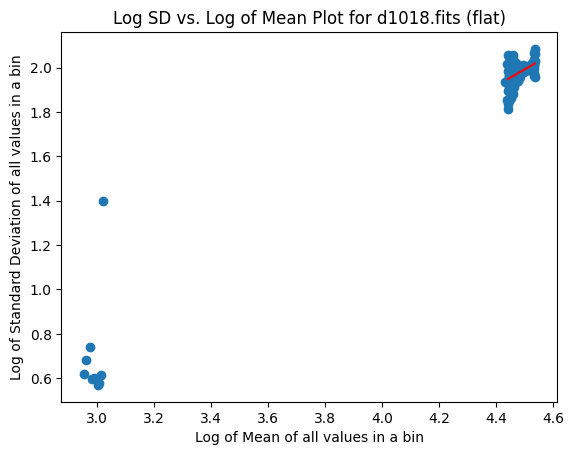

In [ ]:
meanlogs = [math.log(mean, 10) for mean in means]
sdlogs = [math.log(sd, 10) for sd in sds]

meanlogs_linear = meanlogs[15:]
sdlogs_linear = sdlogs[15:]

# Calculate the line of best fit
coefficients = np.polyfit(meanlogs_linear, sdlogs_linear, 1)  # 1 means linear fit (degree 1)
polynomial = np.poly1d(coefficients)
line_of_best_fit = polynomial(meanlogs_linear)

print(f"log(SD) = {coefficients[0]:.2f} log(mean) + {coefficients[1]:.2f}")

# Plot the scatter plot
plt.scatter(meanlogs, sdlogs)
# Plot the line of best fit
plt.plot(meanlogs_linear, line_of_best_fit, color='red', label='Line of Best Fit')

# Add titles and labels
plt.title(f'Log SD vs. Log of Mean Plot for {image.name} ({header["OBJECT"]})')
plt.xlabel('Log of Mean of all values in a bin')
plt.ylabel('Log of Standard Deviation of all values in a bin')

# Show the plot
plt.show()

log(SD) = 0.41 log(mean) + -3300.54


Text(0, 0.5, 'Log of Standard Deviation of all values in a bin')

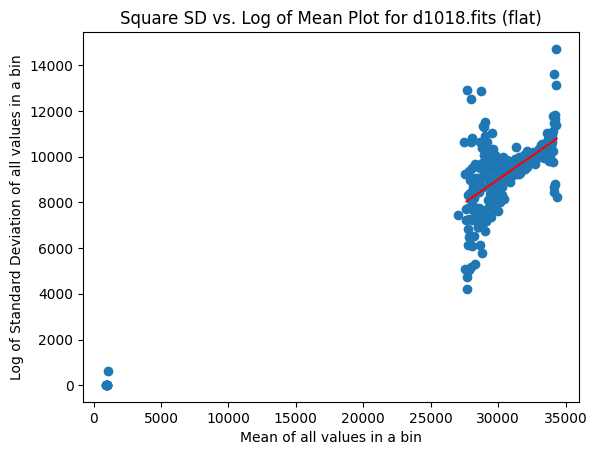

In [ ]:
meanlogs = means
sdlogs = [sd**2 for sd in sds]

meanlogs_linear = meanlogs[15:]
sdlogs_linear = sdlogs[15:]

# Calculate the line of best fit
coefficients = np.polyfit(meanlogs_linear, sdlogs_linear, 1)  # 1 means linear fit (degree 1)
polynomial = np.poly1d(coefficients)
line_of_best_fit = polynomial(meanlogs_linear)

print(f"log(SD) = {coefficients[0]:.2f} log(mean) + {coefficients[1]:.2f}")

# Plot the scatter plot
plt.scatter(meanlogs, sdlogs)
# Plot the line of best fit
plt.plot(meanlogs_linear, line_of_best_fit, color='red', label='Line of Best Fit')

# Add titles and labels
plt.title(f'Square SD vs. Log of Mean Plot for {image.name} ({header["OBJECT"]})')
plt.xlabel('Mean of all values in a bin')
plt.ylabel('Log of Standard Deviation of all values in a bin')

# Show the plot
# plt.show()

In [ ]:
# from display_fits import print_fits_info

# for image in images:
#     print_fits_info(image)

bias


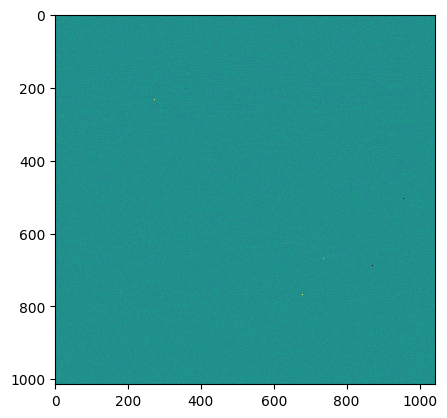

bias


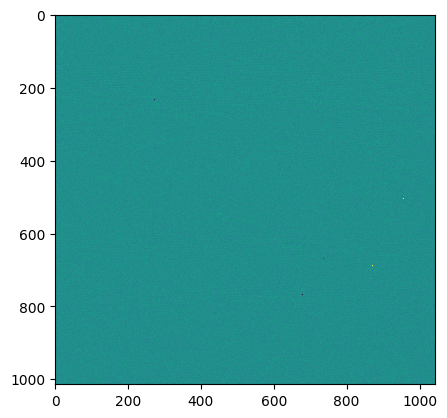

flat


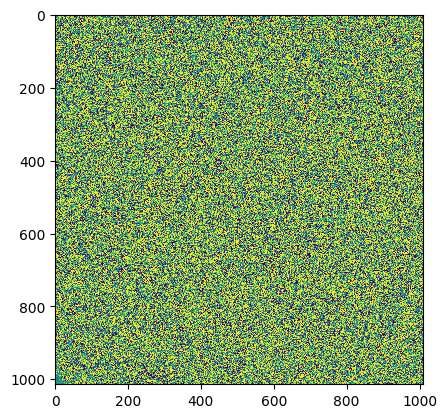

flat


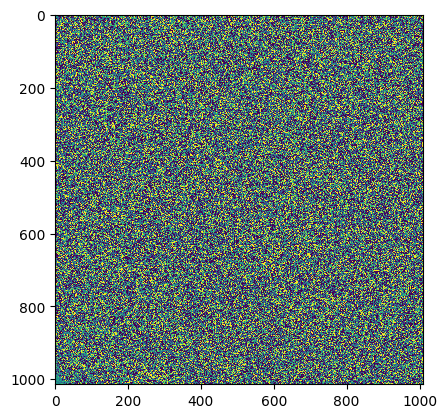

In [ ]:

for objname in obj_counts:
    for diff_image in data_diff_all[objname]:
        print(objname)
        plt.imshow(diff_image, interpolation="nearest", vmin=-100, vmax=100)
        plt.show()